# The Sparks Foundation GRIPMARCH21
## Author: Dedipya Chattaraj
### Data Science and Business Analytics Internship
### Task-5: Exploratory Data Analysis - Sports

As a sports Analyst 
* Find out the most successful teams, players and factors contributing win or loss of a team
* Suggest teams or players a company should endorse for its products

Dataset : https://bit.ly/34SRn3b

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mat= pd.read_csv('matches.csv')
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Number of matches as per dataset
len(mat)

756

In [4]:
bowl= pd.read_csv('deliveries.csv')
bowl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# Checking duplicated rows in both the dataset
print(mat.duplicated().sum())
print(bowl.duplicated().sum())

# Removing duplicated rows in deliveries dataset
bowl=bowl.drop_duplicates()
print(bowl.duplicated().sum())

0
23
0


In [6]:
mat.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


Text(0, 0.5, 'Matches')

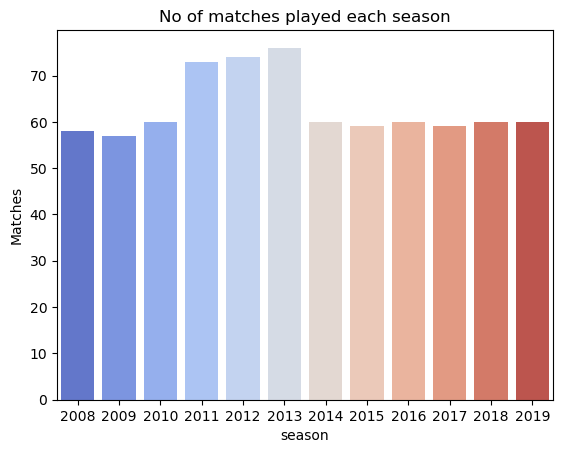

In [7]:
# Number of matches played in each IPL season
print(mat['season'].value_counts())

# Number of matches played in each IPL season graphical representation
sns.countplot(x='season', data= mat, palette= 'coolwarm')
plt.title('No of matches played each season')
plt.ylabel('Matches')

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Delhi Capitals                  16
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64


Text(0, 0.5, 'Matches played')

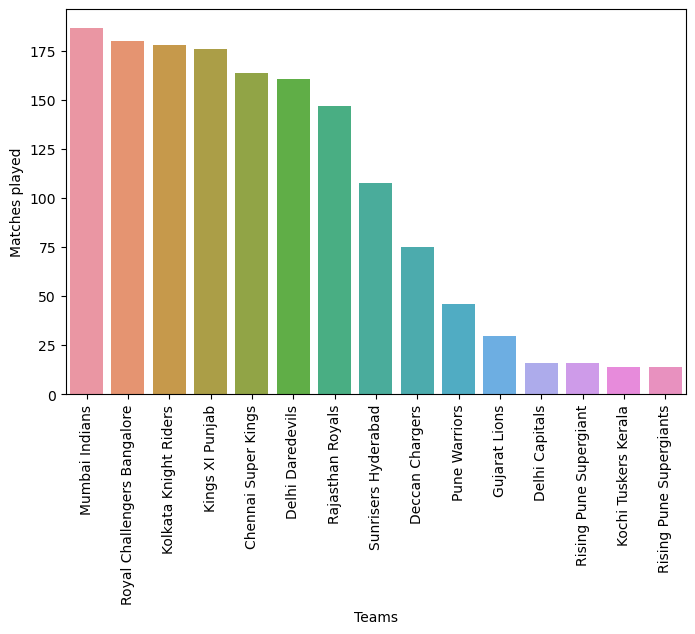

In [8]:
# Total number of matches played by each team in all seasons
total_matches= (mat['team1'].value_counts()+mat['team2'].value_counts()).sort_values(ascending=False)
print(total_matches)

# Graphical Representation of the same
plt.figure(figsize= (8,5))
sns.barplot(x= total_matches.index, y= total_matches.values)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Matches played')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

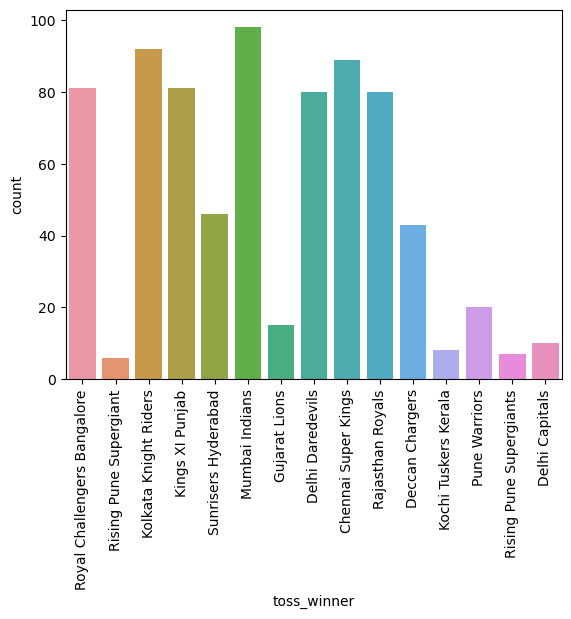

In [9]:
# Top 5 teams who won the most number of tosses 
mat['toss_winner'].value_counts()

# Graphical Representation
sns.countplot(x= mat['toss_winner'], data= mat)
plt.xticks(rotation= 90)

Text(0.5, 0, 'Wins')

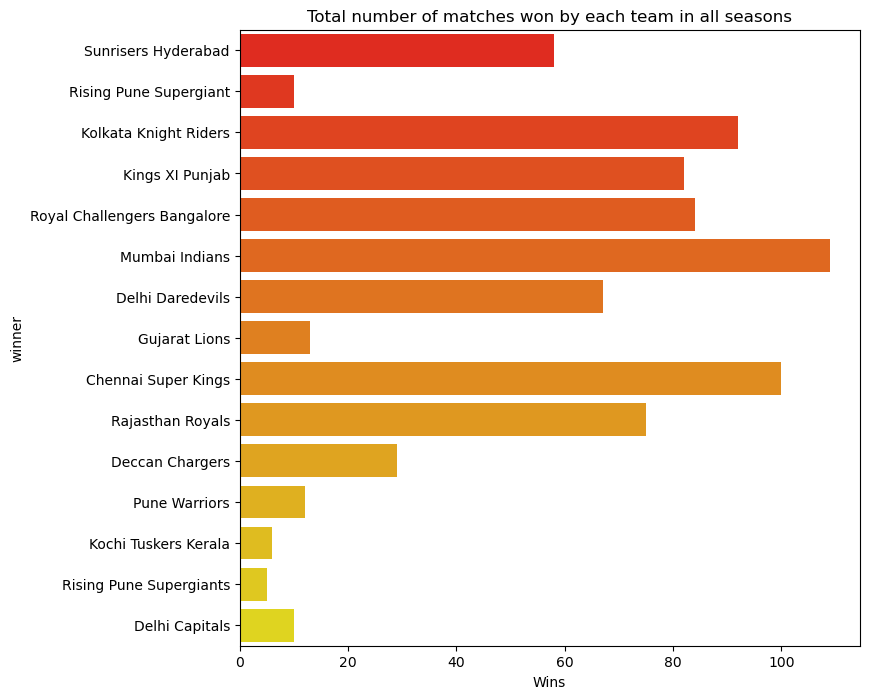

In [10]:
# Number of matches win by all teams in all seasons
plt.figure(figsize=(8,8))
sns.countplot(y= 'winner', data=mat, palette= 'autumn')
plt.title('Total number of matches won by each team in all seasons')
plt.xlabel('Wins')

In [11]:
# Defining a column which tells that a team won by batting or bowling first
mat['win_by_first']= np.where(mat['win_by_runs']>0, 'Batting', 'Bowling')

# Dropping the column of Umpire3 because it is not necessary in our analysis
mat.drop(labels=['umpire3'], axis=1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by_first
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Batting
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Bowling
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Bowling
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Bowling
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Batting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,Bowling
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Bowling
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,Bowling
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Bowling


In [12]:
print(mat['win_by_first'].value_counts())
print('\nAfter extracting the values of each type of win we get: ',mat['win_by_first'].value_counts().values)
print('\nAfter extracting the types of win in a match we get: ',mat['win_by_first'].value_counts().index)

Bowling    419
Batting    337
Name: win_by_first, dtype: int64

After extracting the values of each type of win we get:  [419 337]

After extracting the types of win in a match we get:  Index(['Bowling', 'Batting'], dtype='object')


Text(0.5, 1.0, 'Win by result Pie Chart')

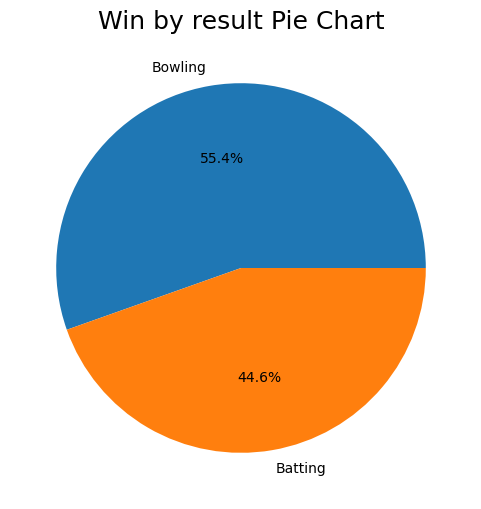

In [13]:
#Pie Chart of the winning percentages
plt.figure(figsize=(6,6))
plt.pie(x= mat['win_by_first'].value_counts().values, labels= mat['win_by_first'].value_counts().index, autopct='%1.1f%%')
plt.title('Win by result Pie Chart', fontsize=18)

Text(0, 0.5, 'No of matches won')

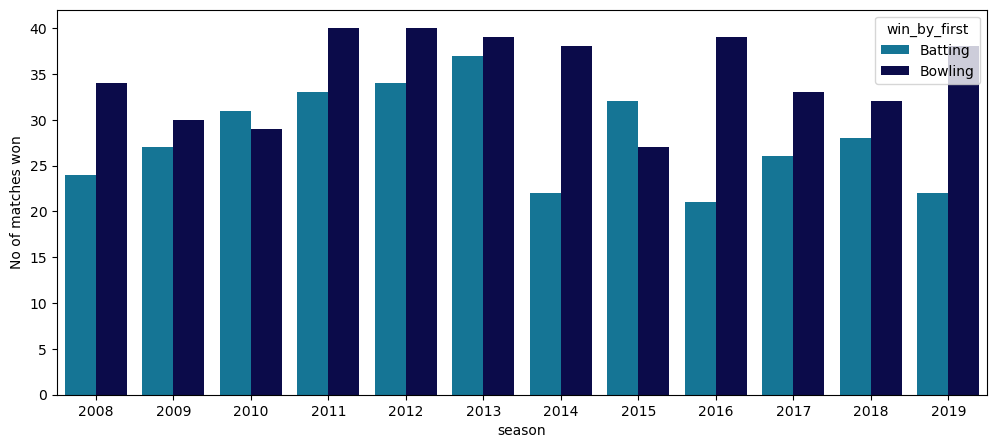

In [14]:
# Number of matches won in each season by batting and bowling first
plt.figure(figsize= (12,5))
sns.countplot(data= mat, x= 'season', hue= 'win_by_first', palette= 'ocean_r')
plt.ylabel('No of matches won')

In [15]:
print(mat['toss_decision'].value_counts())
print('\n',mat['toss_decision'].value_counts().index)
print(mat['toss_decision'].value_counts().values)

field    463
bat      293
Name: toss_decision, dtype: int64

 Index(['field', 'bat'], dtype='object')
[463 293]


Text(0.5, 1.0, 'Toss Result')

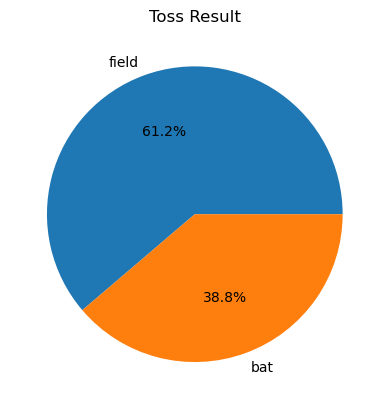

In [16]:
plt.pie(x= mat['toss_decision'].value_counts().values, labels= mat['toss_decision'].value_counts().index, autopct= '%1.1f%%')
plt.title('Toss Result')

In [17]:
# Data frame of the final matches year by year
finals= mat.drop_duplicates(subset= ['season'], keep= 'last').sort_values('season')
finals.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by_first
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,Bowling
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,Batting
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,Batting


In [18]:
# Final match records- Season, Winner and Runner Up
finals['Runner Up']= np.where(finals['team1']!= finals['winner'], finals['team1'], finals['team2'])
finals[['season', 'winner', 'Runner Up']].reset_index(drop= True)

,season,winner,Runner Up
0,2008,Rajasthan Royals,Chennai Super Kings
1,2009,Deccan Chargers,Royal Challengers Bangalore
2,2010,Chennai Super Kings,Mumbai Indians
3,2011,Chennai Super Kings,Royal Challengers Bangalore
4,2012,Kolkata Knight Riders,Chennai Super Kings
5,2013,Mumbai Indians,Chennai Super Kings
6,2014,Kolkata Knight Riders,Kings XI Punjab
7,2015,Mumbai Indians,Chennai Super Kings
8,2016,Sunrisers Hyderabad,Royal Challengers Bangalore
9,2017,Mumbai Indians,Rising Pune Supergiant


Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64


Text(0, 0.5, 'Finals won')

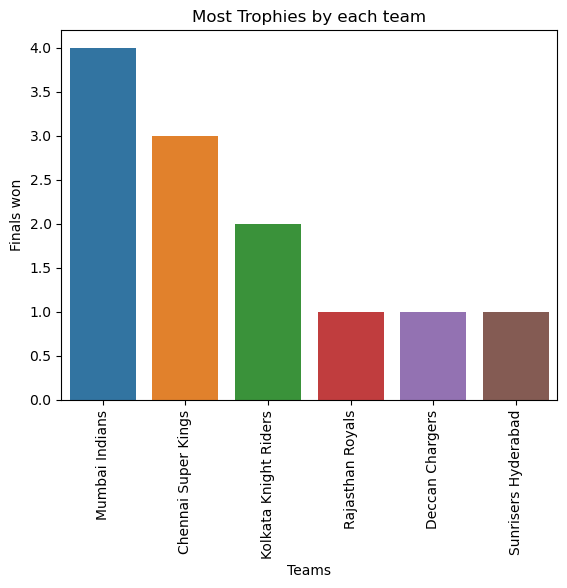

In [19]:
# Finals won by each team 
print(finals['winner'].value_counts())

# Graphical Representation
sns.barplot(x= finals['winner'].value_counts().index, y= finals['winner'].value_counts().values, data= finals)
plt.xticks(rotation= 90)
plt.title('Most Trophies by each team')
plt.xlabel('Teams')
plt.ylabel('Finals won')

Text(0.5, 1.0, 'Win in the finals by batting or bowling first')

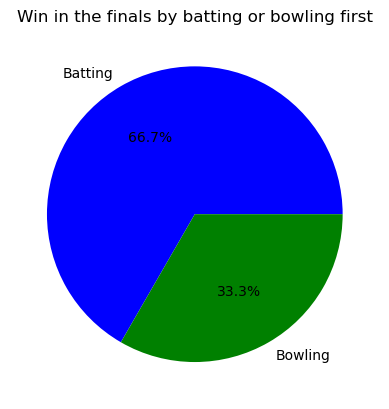

In [20]:
# Win by batting first or bowling first in the finals
finals['win_by_first'].value_counts().values
plt.pie(x= finals['win_by_first'].value_counts().values, labels= finals['win_by_first'].value_counts().index, autopct= '%1.1f%%', colors= ['blue', 'green'])
plt.title('Win in the finals by batting or bowling first')

Text(0.5, 1.0, 'All final matches toss results')

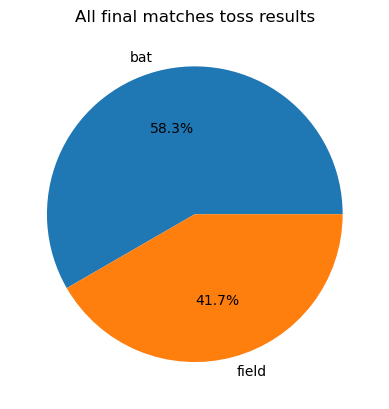

In [21]:
# Final match toss results
plt.pie(x= finals['toss_decision'].value_counts().values, labels= finals['toss_decision'].value_counts().index, autopct= '%1.1f%%')
plt.title('All final matches toss results')

In [22]:
# Player of the matches
mat['player_of_match'].value_counts().head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

Text(0, 0.5, 'Players')

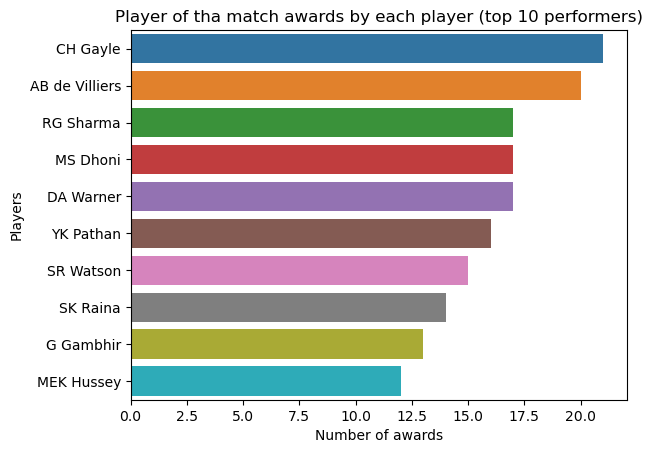

In [23]:
# Top 10 man of the match players in all seasons
sns.barplot(y=mat['player_of_match'].value_counts().index[0:10], x=mat['player_of_match'].value_counts().values[0:10], data= mat)
plt.title('Player of tha match awards by each player (top 10 performers)')
plt.xlabel('Number of awards')
plt.ylabel('Players')

In [24]:
# Print IPL Finals venues and winners along with the number of wins.
finals.groupby(['city', 'winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [25]:
# Printing toss winner, toss decision & winner in finals of each season
finals[['toss_winner', 'toss_decision', 'winner']].reset_index(drop= True)

,toss_winner,toss_decision,winner
0,Rajasthan Royals,field,Rajasthan Royals
1,Royal Challengers Bangalore,field,Deccan Chargers
2,Chennai Super Kings,bat,Chennai Super Kings
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Kolkata Knight Riders
5,Mumbai Indians,bat,Mumbai Indians
6,Kolkata Knight Riders,field,Kolkata Knight Riders
7,Chennai Super Kings,field,Mumbai Indians
8,Sunrisers Hyderabad,bat,Sunrisers Hyderabad
9,Mumbai Indians,bat,Mumbai Indians


In [26]:
# Print the man of the match in each final
finals[['winner', 'player_of_match']].reset_index(drop= True)

,winner,player_of_match
0,Rajasthan Royals,YK Pathan
1,Deccan Chargers,A Kumble
2,Chennai Super Kings,SK Raina
3,Chennai Super Kings,M Vijay
4,Kolkata Knight Riders,MS Bisla
5,Mumbai Indians,KA Pollard
6,Kolkata Knight Riders,MK Pandey
7,Mumbai Indians,RG Sharma
8,Sunrisers Hyderabad,BCJ Cutting
9,Mumbai Indians,KH Pandya


caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64


Text(0, 0.5, 'Number of times')

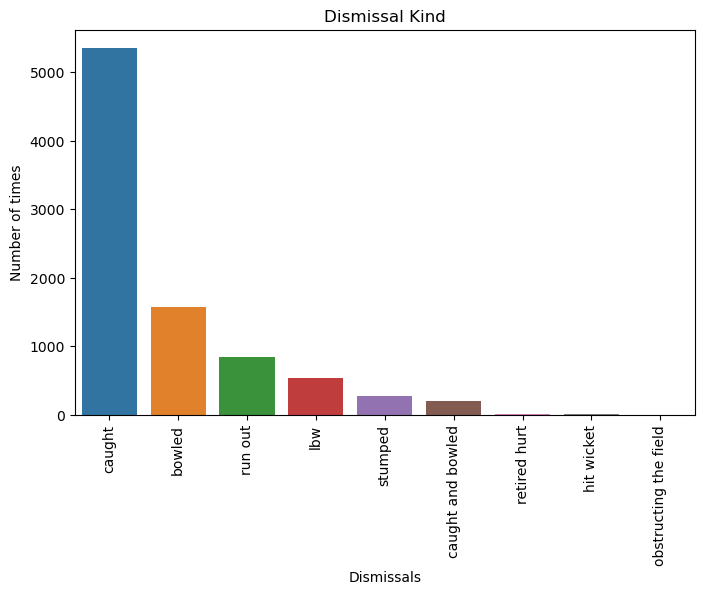

In [27]:
# Frequent form of Dismissal
print(bowl['dismissal_kind'].value_counts())

# Graphical Representation
plt.figure(figsize=(8,5))
sns.barplot(x= bowl['dismissal_kind'].value_counts().index, y= bowl['dismissal_kind'].value_counts().values, data= bowl)
plt.xticks(rotation=90)
plt.title('Dismissal Kind')
plt.xlabel('Dismissals')
plt.ylabel('Number of times')

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: bowler, dtype: int64


Text(0, 0.5, 'Wickets')

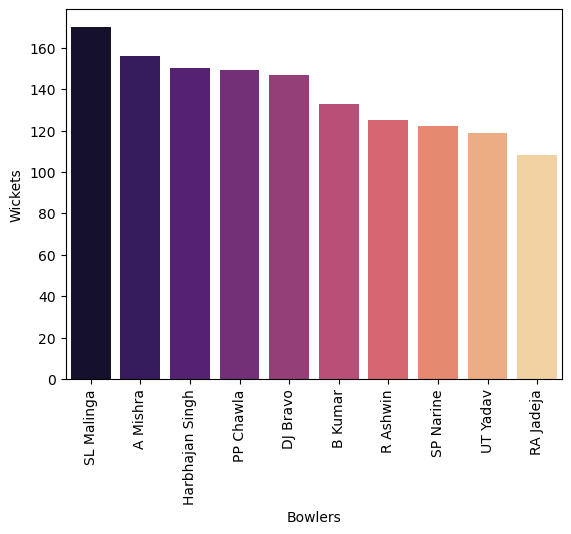

In [28]:
# Most wickets taken by a bowler
dismissals= ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
wickets= bowl[bowl['dismissal_kind'].isin(dismissals)]
print(wickets['bowler'].value_counts().sort_values(ascending= False)[:10])

# Graphical representation of the same
sns.barplot(x= wickets['bowler'].value_counts().index[:10], y= wickets['bowler'].value_counts().values[:10], palette= 'magma', data=wickets)
plt.xticks(rotation= 90)
plt.xlabel('Bowlers')
plt.ylabel('Wickets')

Z Khan            52
B Kumar           46
UT Yadav          45
DS Kulkarni       44
I Sharma          43
Sandeep Sharma    43
P Kumar           40
A Nehra           40
SL Malinga        37
M Morkel          36
Name: bowler, dtype: int64


Text(0.5, 1.0, 'Number of wickets taken by a bowler in powerplay')

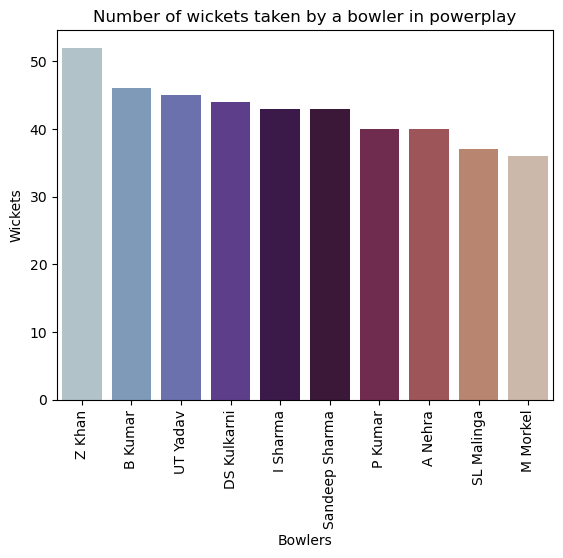

In [29]:
# Best powerplay wicket takers
powerplay= [1,2,3,4,5,6]
pp_wickets= bowl[bowl['dismissal_kind'].isin(dismissals) & bowl['over'].isin(powerplay)]
print(pp_wickets['bowler'].value_counts()[0:10])

# Graphical Representation of the same
sns.barplot(x= pp_wickets['bowler'].value_counts().index[0:10], y= pp_wickets['bowler'].value_counts().values[0:10], data= pp_wickets, palette= 'twilight')
plt.xticks(rotation=90)
plt.xlabel('Bowlers')
plt.ylabel('Wickets')
plt.title('Number of wickets taken by a bowler in powerplay')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SL Malinga'),
  Text(1, 0, 'DJ Bravo'),
  Text(2, 0, 'B Kumar'),
  Text(3, 0, 'SP Narine'),
  Text(4, 0, 'A Nehra'),
  Text(5, 0, 'DW Steyn'),
  Text(6, 0, 'UT Yadav'),
  Text(7, 0, 'R Vinay Kumar'),
  Text(8, 0, 'JJ Bumrah'),
  Text(9, 0, 'RP Singh')])

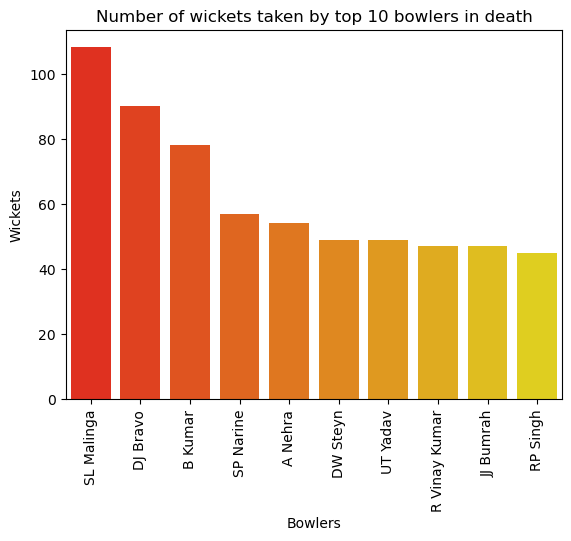

In [30]:
# Best Death Overs wicket takers
death_overs= [16,17,18,19,20]
do_bowlers= bowl[bowl['over'].isin(death_overs) & bowl['dismissal_kind'].isin(dismissals)]
do_bowlers['bowler'].value_counts()[:10]

# Graphical Representation
sns.barplot(x= do_bowlers['bowler'].value_counts().index[:10], y= do_bowlers['bowler'].value_counts().values[:10], palette= 'autumn')
plt.xlabel('Bowlers')
plt.ylabel('Wickets')
plt.title('Number of wickets taken by top 10 bowlers in death')
plt.xticks(rotation= 90)

                batsman_runs
batsman                     
V Kohli                 5434
SK Raina                5415
RG Sharma               4914
DA Warner               4741
S Dhawan                4631
CH Gayle                4560
MS Dhoni                4477
RV Uthappa              4444
AB de Villiers          4428
G Gambhir               4223


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'V Kohli'),
  Text(1, 0, 'SK Raina'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'DA Warner'),
  Text(4, 0, 'S Dhawan'),
  Text(5, 0, 'CH Gayle'),
  Text(6, 0, 'MS Dhoni'),
  Text(7, 0, 'RV Uthappa'),
  Text(8, 0, 'AB de Villiers'),
  Text(9, 0, 'G Gambhir')])

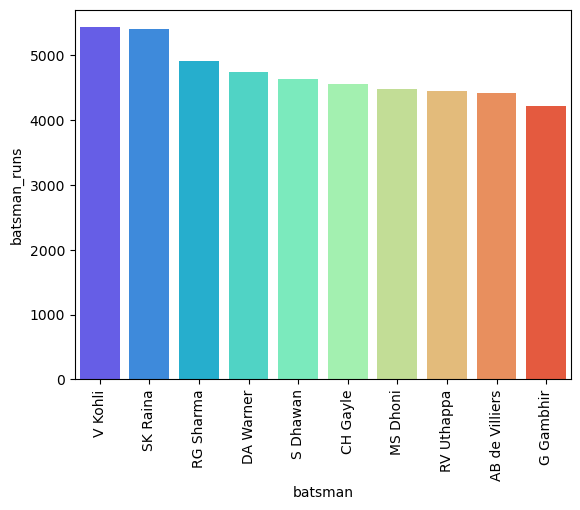

In [31]:
# Runs by top 10 batsman
best_batsman= bowl.groupby(['batsman']).batsman_runs.sum().reset_index().sort_values(by= ['batsman_runs'], ascending= False).head(10)
best_batsman= best_batsman.set_index('batsman')
print(best_batsman)

# Graphical Respresentation
sns.barplot(x= best_batsman.index, y= best_batsman['batsman_runs'], data= best_batsman, palette= 'rainbow')
plt.xticks(rotation=90)

            batsman  batsman_runs
265        MS Dhoni          2669
194      KA Pollard          1562
335       RG Sharma          1450
24   AB de Villiers          1412
439         V Kohli          1154
459       YK Pathan          1134
199      KD Karthik          1073
330       RA Jadeja           940
463    Yuvraj Singh           911
48        AT Rayudu           887


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MS Dhoni'),
  Text(1, 0, 'KA Pollard'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'AB de Villiers'),
  Text(4, 0, 'V Kohli'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'KD Karthik'),
  Text(7, 0, 'RA Jadeja'),
  Text(8, 0, 'Yuvraj Singh'),
  Text(9, 0, 'AT Rayudu')])

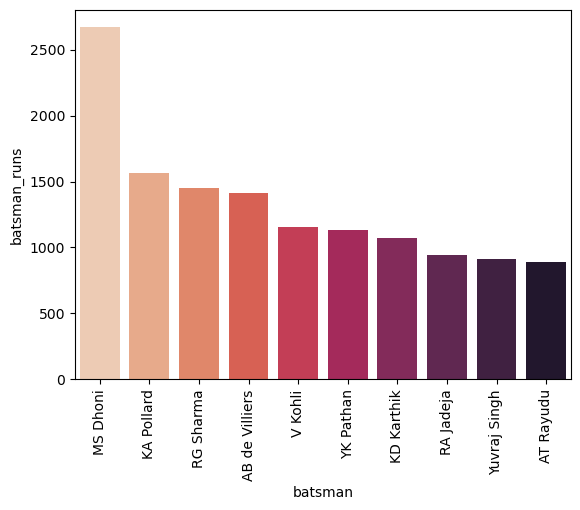

In [32]:
# Best batsman in the death overs
death_batsman= bowl[bowl['over'].isin(death_overs)]
death_batsman= death_batsman.groupby(['batsman']).batsman_runs.sum().reset_index().sort_values(by=['batsman_runs'], ascending=False).head(10)
print(death_batsman)

# Graphical Representation
sns.barplot(x= death_batsman['batsman'], y= death_batsman['batsman_runs'], data= death_batsman, palette= 'rocket_r')
plt.xticks(rotation= 90)

## Conclusion

* As per the datasets provided  there are records of total 756 matches

* 2013 was the year when highest number of matches were played and in 2009 least matches were played.

* Mumbai Indians played the most number of IPL Matches 

* Mumbai Indians won most number of trophies, tosses and matches

## Most Successful teams
* Mumbai Indians is the most successful team with 4 IPL trophies.
* Then there comes Chennai Super Kings who have 3 IPL trophies. 
* Then comes Kolkata Knight Riders who won 2 times. 
* Along with them comes the Hyderabad Franchise who also won 2 times but with different names (1 time won as Sunrisers Hyderabad and 1 time won as Deccan Chargers). 
* Rajasthan Royals won the trophy 1 time

## Most Successful Players
* Chris Gayle won the man of the match highest number of times followed by AB De Villiars.
* Lasith Malinga is the highest wicket taker also a crucial death bowler.
* Zaheer Khan is the best in Powerplay overs.
* Virat Kohli is the best batsman with highest number of runs followed by Suresh Raina and Rohit Sharma.
* MS Dhoni is the best batsman in the death overs.

## Factors affecting the result of a game
* 55.4% of the games have been won by bowling first where as 44.5% games have been won by batting first. 
* 61.2% times the toss decision was to bowl first. 
* 66.7% times in the finals the teams win by defending the score that is batting first.

## Suggest teams or Players a company should endorse for its products.
### Franchise:
* Mumbai Indians and Chennai Super Kings are the teams which the company should look at to endorse for its products.

### Players
* Players such as Virat Kohli, Rohit Sharma, MS Dhoni are the Indian Players whom the company should look at for endrosing the products because they have a huge fanbase and can attract large number of audience
* If companies are looking for foreign players then they should be Chris Gayle, AB De Villiars, Lasith Malinga
* Other players like Bhuvneshwar Kumar, Suresh Raina and Sikhar Dhawan can also attract a large amount of people which can be benificial for a company
* Considering the data these teams and players are the ones whom the companies should look at